# Frequency Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline

## Problem 1.1

In [2]:
daily_demand = pd.Series([2, 1, 0, 2, 1, 3, 0, 2, 4, 0, 3, 2, 3, 4, 2, 2, 2, 4, 3, 0])

In [3]:
df = pd.DataFrame({'Frequency': daily_demand.value_counts().sort_index()}, index = sorted(daily_demand.unique()))
df.index.name = 'Daily Demand'
df.loc['Total'] = df.sum()
df

,Frequency
Daily Demand,
0,4
1,2
2,7
3,4
4,3
Total,20


## Problem 1.2

In [4]:
df['Relative Frequency'] = pd.Series(daily_demand.value_counts(normalize = True).sort_index())
df.loc['Total', 'Relative Frequency'] = df['Relative Frequency'].sum()
df

,Frequency,Relative Frequency
Daily Demand,,
0,4,0.20
1,2,0.10
2,7,0.35
3,4,0.20
4,3,0.15
Total,20,1.00


## Problem 1.3

In [5]:
df['Cumulative Relative Frequency'] = df['Relative Frequency'].cumsum()
df.loc['Total', 'Cumulative Relative Frequency'] = df['Relative Frequency'].sum() - 1
df

,Frequency,Relative Frequency,Cumulative Relative Frequency
Daily Demand,,,
0,4,0.20,0.20
1,2,0.10,0.30
2,7,0.35,0.65
3,4,0.20,0.85
4,3,0.15,1.00
Total,20,1.00,1.00


## Problem 1.4

In [6]:
calls_per_day = pd.Series([4,5,1,0,7,8,3,6,8,3,0,9,2,12,14,5,5,10,7,2,11,9,4,3,1,5,7,3,5,6])

In [7]:
cuts = pd.cut(calls_per_day, [0,2,5,8,11,14], include_lowest=True)
df2 = pd.DataFrame(pd.value_counts(cuts, sort=False),  columns = ['Frequency'])
df2.index.name = 'Calls per Day'
df2

,Frequency
Calls per Day,
"(-0.001, 2.0]",6
"(2.0, 5.0]",11
"(5.0, 8.0]",7
"(8.0, 11.0]",4
"(11.0, 14.0]",2


## Problem 1.5

In [8]:
df2['Relative Frequency'] = pd.value_counts(cuts, sort=False, normalize=True)
df2

,Frequency,Relative Frequency
Calls per Day,,
"(-0.001, 2.0]",6,0.200000
"(2.0, 5.0]",11,0.366667
"(5.0, 8.0]",7,0.233333
"(8.0, 11.0]",4,0.133333
"(11.0, 14.0]",2,0.066667


## Problem 1.6

In [9]:
df2['Cumulative Relative Frequency'] = df2['Relative Frequency'].cumsum()
df2

,Frequency,Relative Frequency,Cumulative Relative Frequency
Calls per Day,,,
"(-0.001, 2.0]",6,0.200000,0.200000
"(2.0, 5.0]",11,0.366667,0.566667
"(5.0, 8.0]",7,0.233333,0.800000
"(8.0, 11.0]",4,0.133333,0.933333
"(11.0, 14.0]",2,0.066667,1.000000


## Problem 1.7

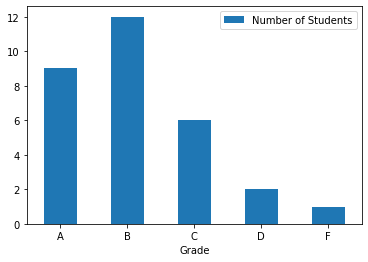

In [10]:
df3 = pd.DataFrame({'Grade': ['A', 'B', 'C', 'D', 'F'], 'Number of Students': [9, 12, 6, 2, 1]})
df3.plot.bar(x = 'Grade', y = 'Number of Students', rot = 0)

## Problem 8

In [11]:
com_miles = pd.Series([0,1,2,5,5,5,6,6,6,7,7,7,7,9,9,9,11,11,11,13,13,13,14,14,14,14,14,14,14,14,15,15,15,15,15,
                       17,17,18,18,19,19,21,21,21,21,21,21,24,24,23])

Text(0, 0.5, 'Number of Employees')

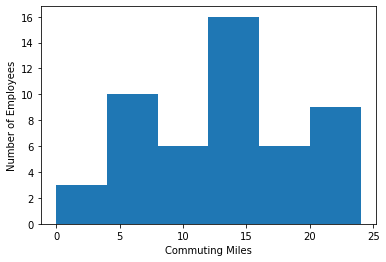

In [12]:
hist1 = com_miles.plot(kind='hist', bins=6)
hist1.set_xlabel("Commuting Miles")
hist1.set_ylabel("Number of Employees")

## Problem 9

In [13]:
miles_per_tank = pd.Series([302, 315, 265, 296, 289, 301, 308, 280, 285, 318,
                           267, 300, 309, 312, 299, 316, 301, 286, 281, 311,
                           272, 295, 305, 283, 309, 313, 278, 284, 296, 291,
                           310, 302, 282, 287, 307, 305, 314, 318, 308, 280])

Text(0, 0.5, 'Number of Tanks')

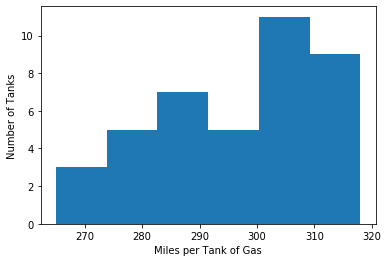

In [14]:
hist2 = miles_per_tank.plot(kind='hist', bins=6)
hist2.set_xlabel('Miles per Tank of Gas')
hist2.set_ylabel('Number of Tanks')

## Problem 10

In [ ]:
home_runs = pdSeries([48,40,38,37,37,37,37,37,36,36,
                     35,34,34,34,33,33,33,33,33,33,
                     33,32,32,32,32,32,31,31,29,29,
                     29,29,28,28,27,27,27,27,27,26])
hist3 = home_runs.plot(kind='hist', bins=)